In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score



In [2]:
Housing=pd.read_csv('housing data.csv',names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

## EXERCICI 1

## Análisis exploratorio preliminar del dataset  

El dataset contiene datos acerca de las características económicas, sociales y ambientales de varias áreas situadas en los alrededores de Boston.Fue creado con la intención de valorar el impacto de estas características sobre el precio medio de la vivienda en propiedad.

In [ ]:
Descripción del dataset y de sus variables :
    
1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.

In [5]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
Housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
Housing.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


El dataset está compuesto de 506 filas (las ciudades alrededor de Boston), y 14 columnas (las variables)

Las variables son todas numéricas contínuas de tipo float64 a la excepción de las siguientes :

CHAS : es una variable discreta binaria (1,0), 1 si el área linda con el río Charles, 0 sino.
RAD : es una variable discreta categórica que representa la facilidad de acceso a las autopistas, siendo 1 el grado mínimo (menor facilidad de acceso) y 24 el grado máximo (mayor facilidad de acceso)
El dataset no presenta ningún valor Null o NaN

In [8]:
Housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## Distribución de las variables

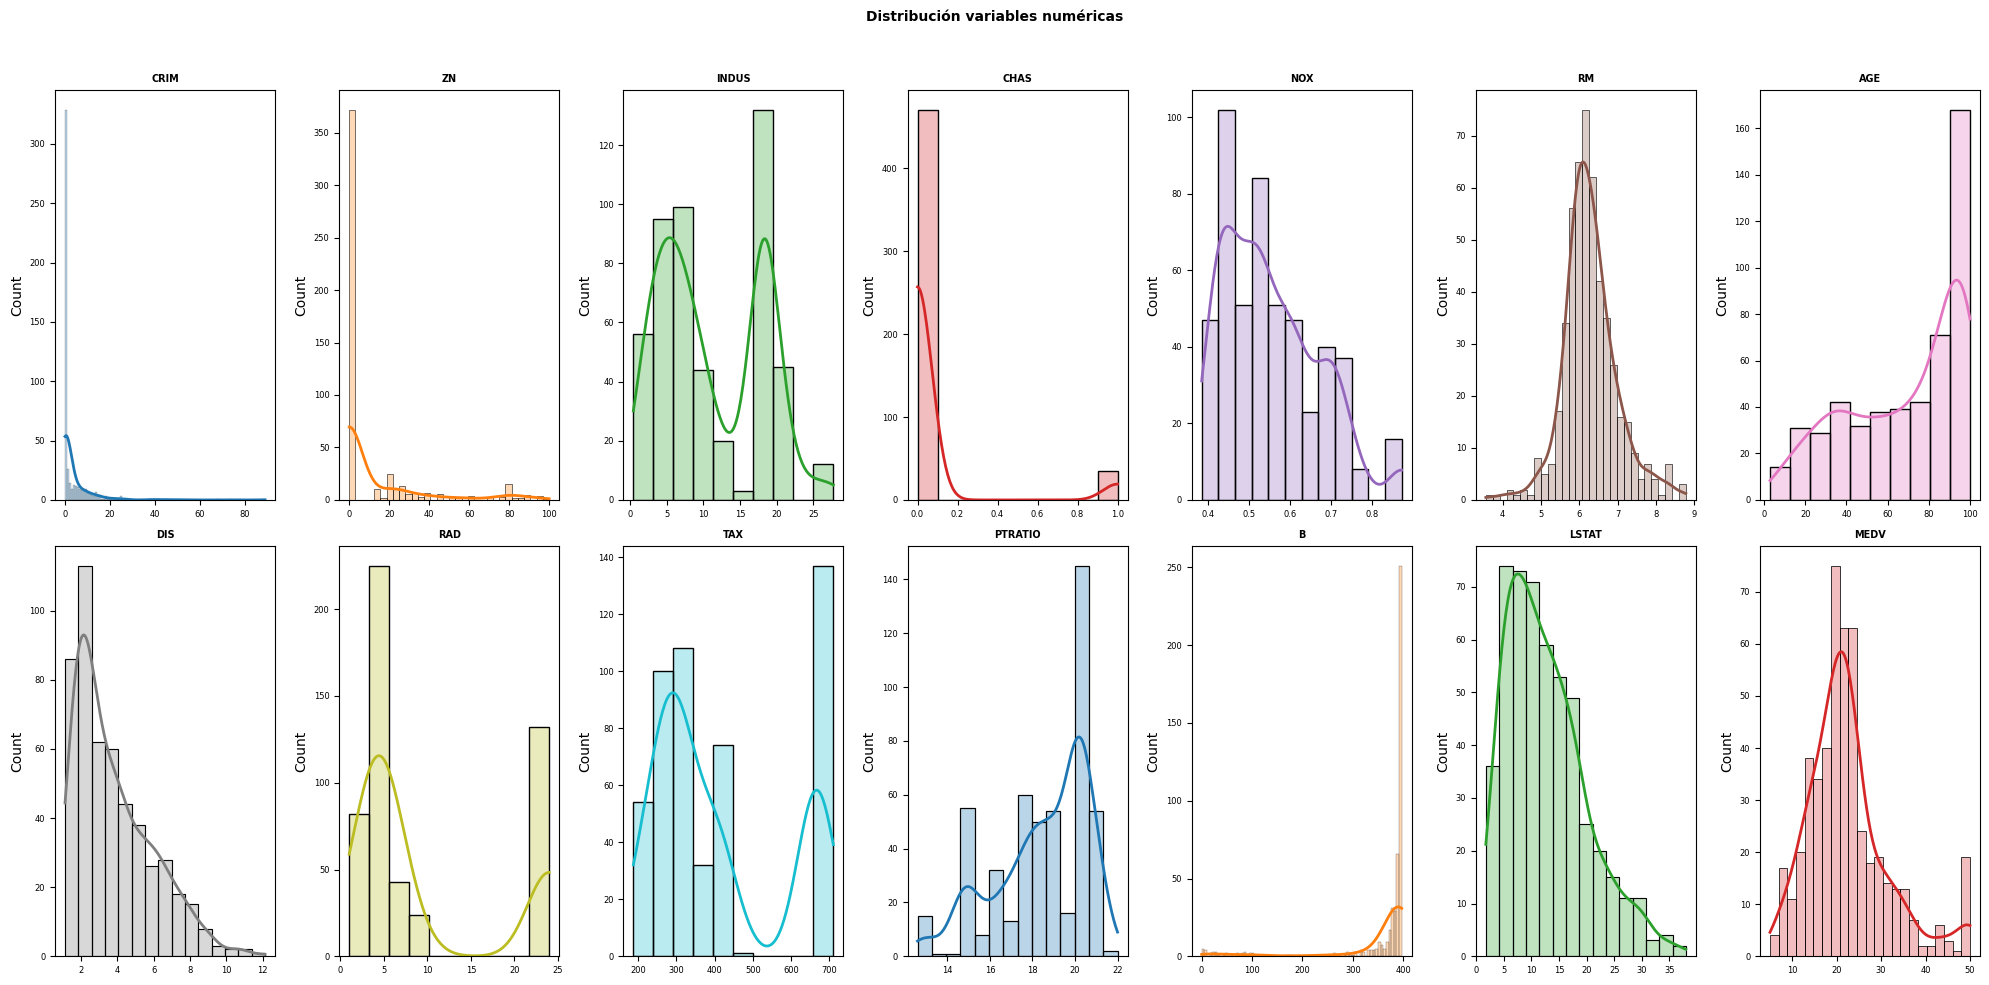

In [9]:
# Gráfico de distribución para cada variable numérica

fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20, 10))
axes = axes.flat
columnas_numeric = Housing.select_dtypes(include=['float64', 'int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = Housing,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

Averiguamos si alguna de las variables presenta una distribución Gaussiana con el test de SHAPIRO WILK

H0 : la variable está normalmente distribuida  
H1 : la variable no está normalmente distribuida

In [10]:
from scipy.stats import shapiro

list_gauss=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']
for i in list_gauss:
    data=Housing[i]
    stat, p = shapiro(data)
    print('p_value '+str(i),p)

p_value CRIM 1.3285678005931464e-36
p_value ZN 7.882576753156324e-34
p_value INDUS 1.0642375893751083e-17
p_value CHAS 2.350467979135232e-40
p_value NOX 5.775851259944009e-14
p_value RM 2.4107271734408187e-10
p_value AGE 2.2311304847966706e-18
p_value DIS 2.1851281171594835e-17
p_value RAD 8.072354053650428e-30
p_value TAX 1.1629790572690724e-23
p_value PTRATIO 2.359104548622454e-17
p_value B 6.057845995608311e-36
p_value LSTAT 8.285112504911873e-14
p_value MEDV 4.939965499209636e-16


En todos los casos, el p-value es inferior al 5%, tenemos que rechazar H0, las distribuciones no son Gaussianas

## Correlación entre variables

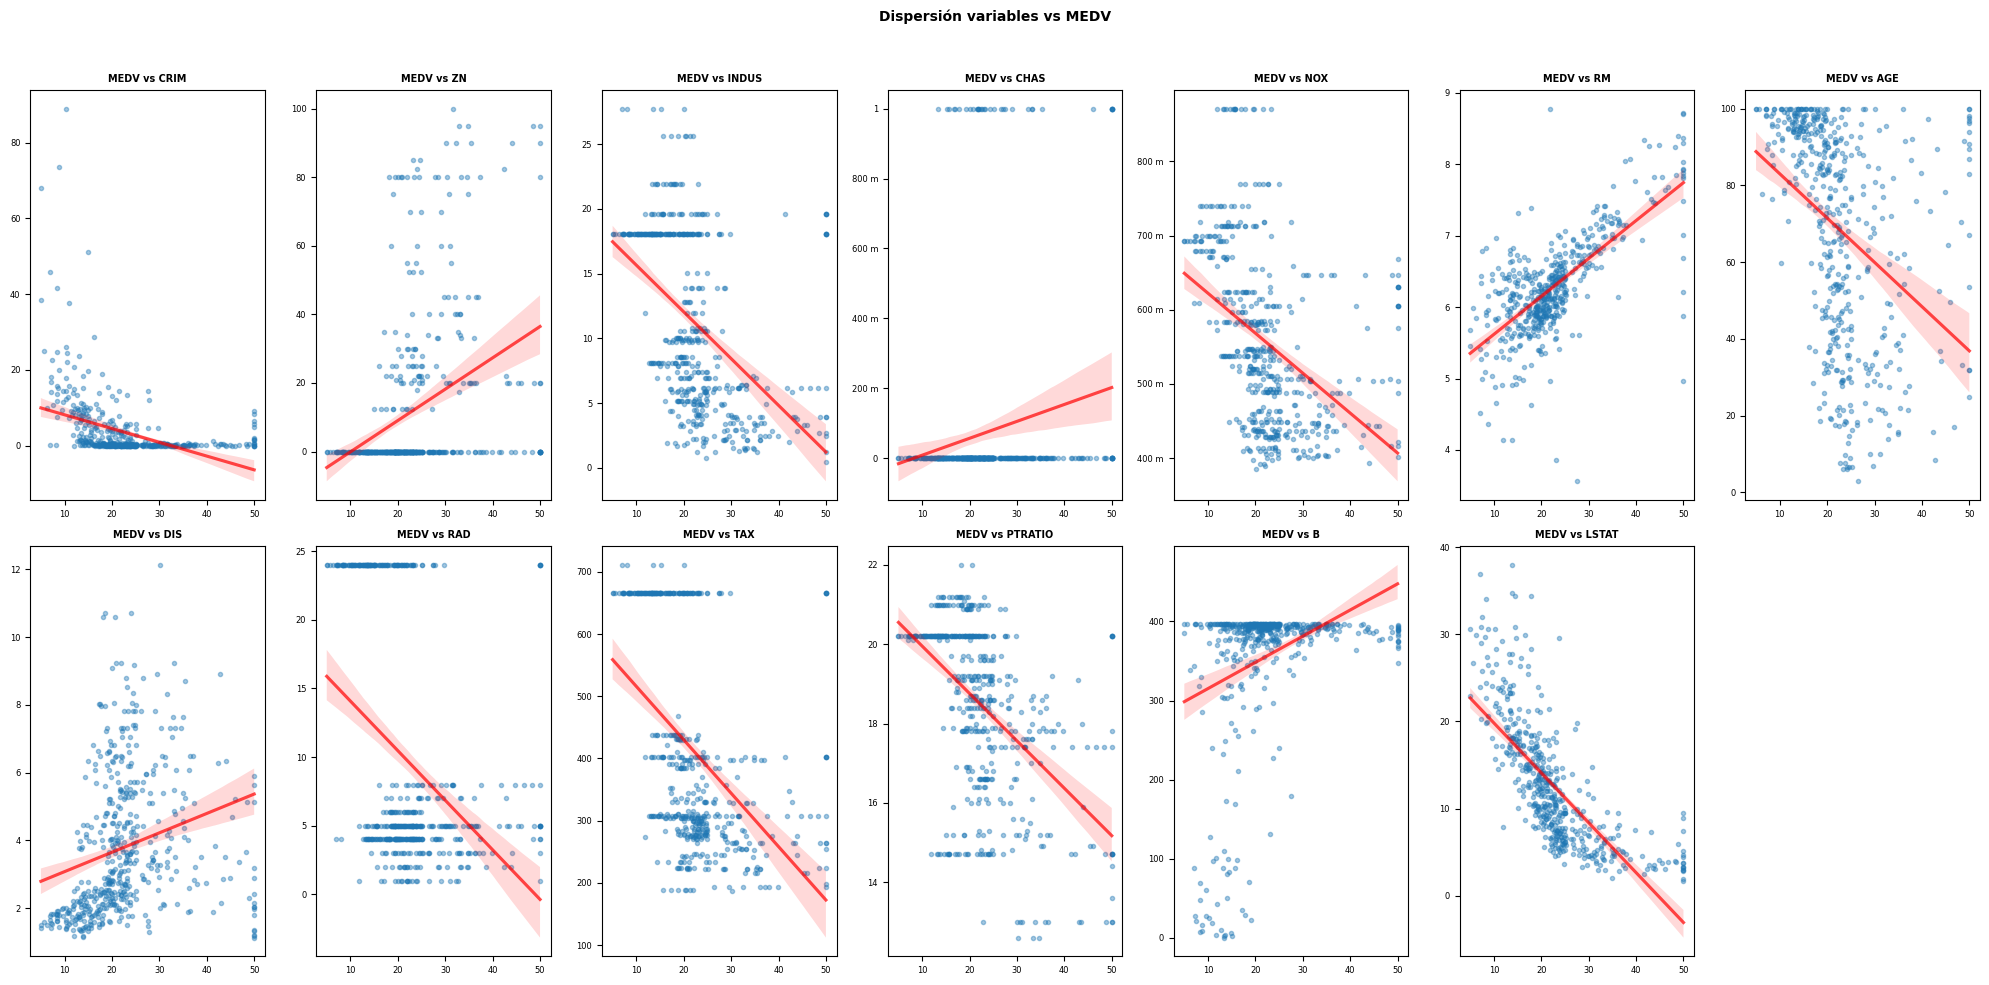

In [11]:

# Gráfico de dispersión de las variables con respecto a MEDV

fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20, 10))
axes = axes.flat
columnas_numeric = Housing.select_dtypes(include=['float64', 'int64']).columns
columnas_numeric = columnas_numeric.drop('MEDV')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = Housing['MEDV'],
        y           = Housing[colum],
        #color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"MEDV vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [13]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Dispersión variables vs MEDV', fontsize = 10, fontweight = "bold");

<AxesSubplot:>

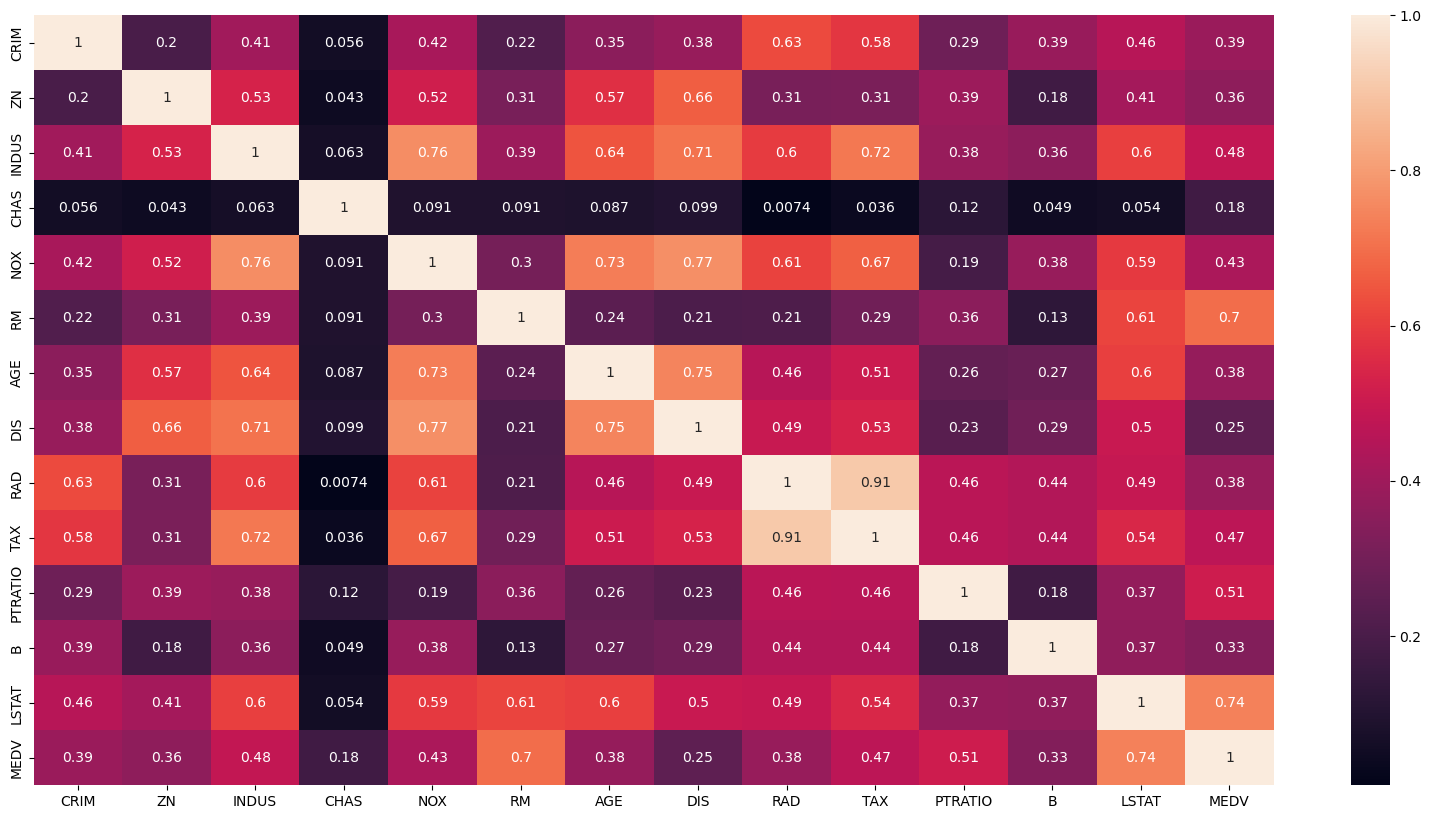

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(Housing.corr().abs(),annot=True)

Estas representaciones nos permiten detectar que la variable MEDV parece tener una correlación significativa (entre 0,4 y 0,6) con las siguientes variables : INDUS,TAX, NOX, PTRATIO y muy significativa (más de 0,7) con aquellas : LSTAT Y RM

## Análisis de Outliers

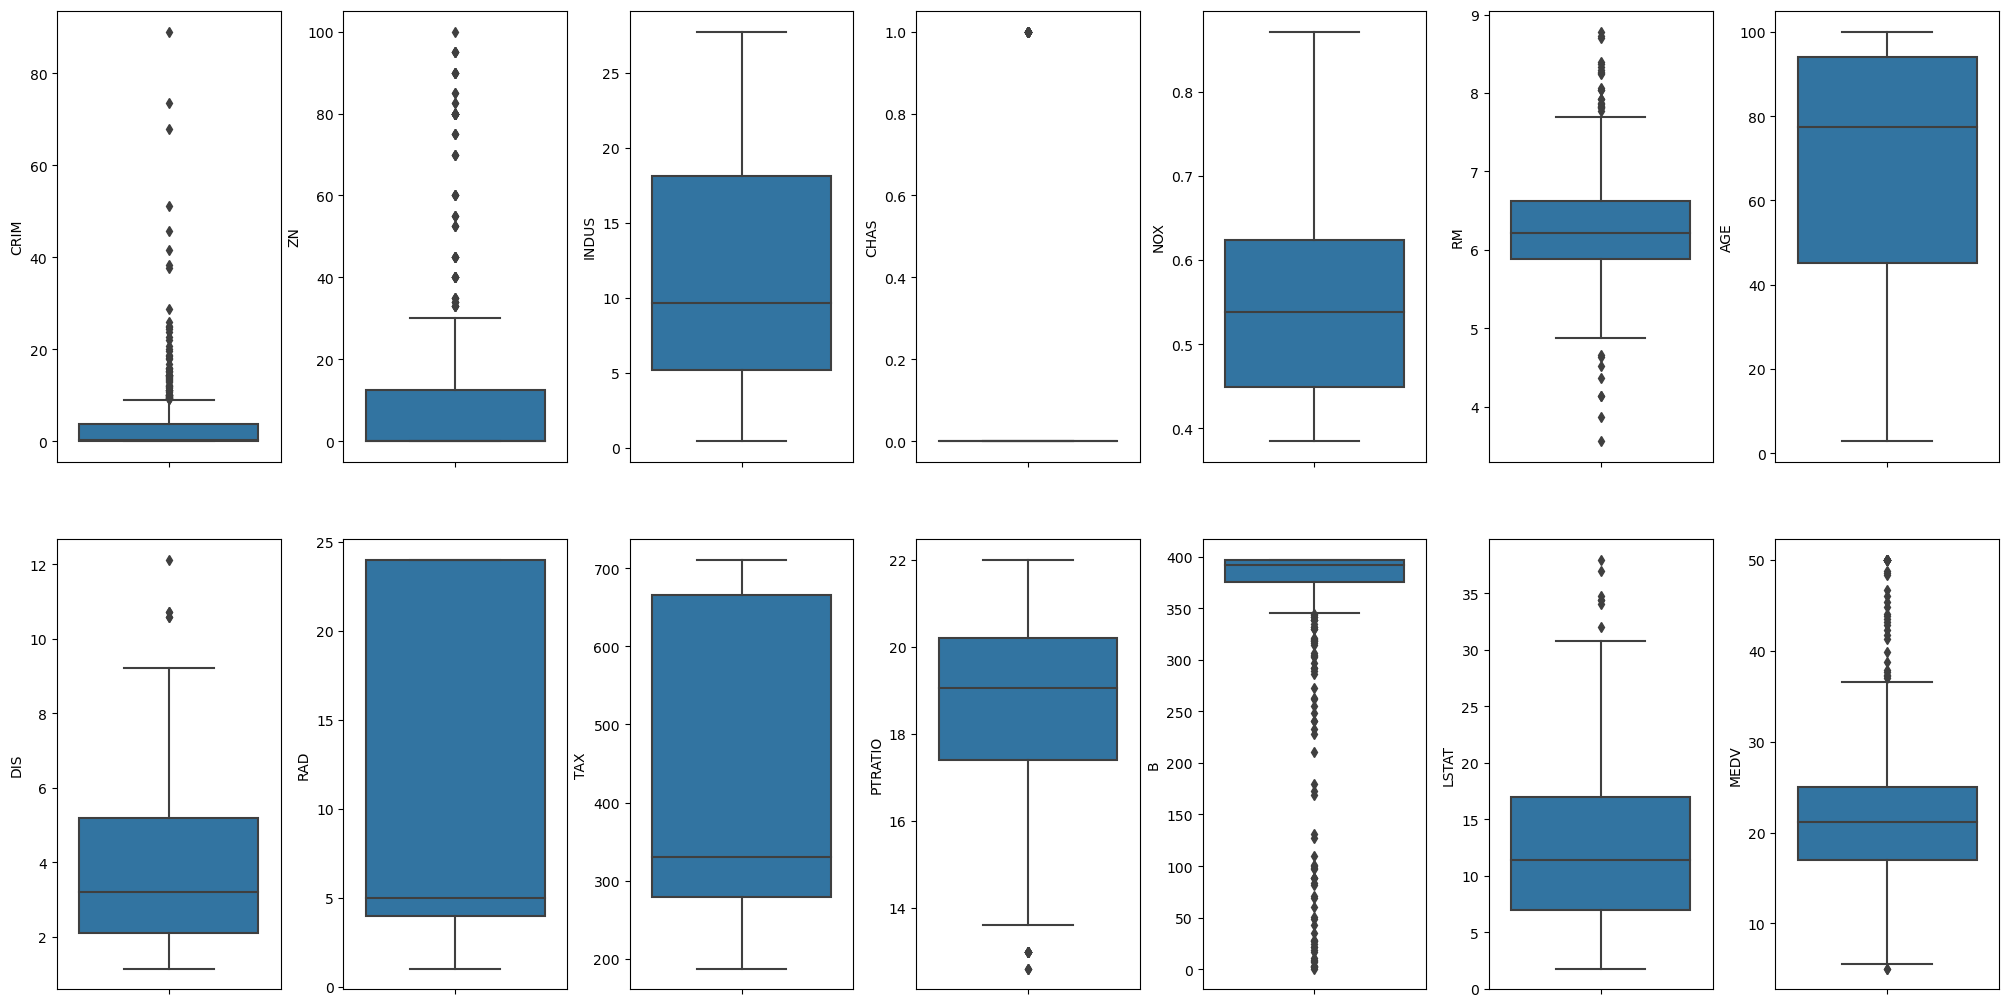

In [13]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in Housing.items():
    sns.boxplot(y=k, data=Housing, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Del resumen estadístico y gráfico podemos destacar lo siguiente :

Las variables CRIM,ZN,B y MEDV tienen los valores muy concentrados alrededor de la media, y presentan una serie de outliers muy alejados de la media, los cuales debemos valorar si podrían ser errores, y de no poderse calificar como tal, valorar más adelante en que medida deben ser corregidos o no en la fase del pre-processing, por su posible influencia en los modelos predictivos. Como podemos ver más abajo, ninguno de estos valores puede ser calificado como error:

 - CRIM : la media del ratio de delincuencia es de 3,6 individuos por 100 en la población, y el 75% de las observaciones están por debajo de esta media, no obstante, no podemos descartar que ciertos barrios tengan un ratio de delincuencia muy alto hasta el máximo de 88,9 indiv individuos por 100 habitantes.  
 
 
 - ZN : la mayoría de las áreas no tienen ninguna zona reservada para parcela de más de 25.000 sq.ft (2.250 sqm), es coherente que algunas pocas puedan llegar a tener cerca o hasta incluso el 100% reservadas.  
 
 
 - B: los datos están muy concentrados alrededor de la media de 356, un dato que representa el peso de la población afro-americana en la población total, ciertos datos tienden a 0. No podemos descartar que en ciertas áreas la representación de la población afro-americana tienda a 0.  
 
 
 - MEDV : aunque el 75% de las viviendas de los alrededores de Boston tengan un precio inferior a 25.000USD, no podemos descartar que algunas pocas viviendas alcancen el precio de 50.000USD.
 

## División train y test

Vamos a considerar que la variable y/output sobre la cual queremos realizar predicciones es MEDV, y el resto de variables que conforman e grupo X/input son las otras variables del dataset.

Aplicamos la proporción 80 train/20 test.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
                                        Housing.drop('MEDV', axis = 'columns'),
                                        Housing['MEDV'],
                                        train_size   = 0.8,
                                        random_state = 1,
                                        )

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


## Comparativa variable target train y test

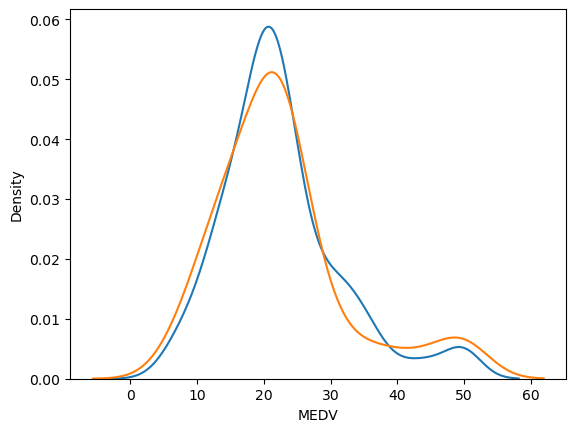

In [18]:
sns.kdeplot(y_train)
sns.kdeplot(y_test)
plt.show()

Las muestras train y test de la variable target MEDV son muy similares

## Comparativa variables input train y test

In [19]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.697455,9.146743,0.00632,0.082598,0.234405,3.594927,88.9762
ZN,404.0,11.527228,23.288284,0.00000,0.000000,0.000000,20.000000,100.0000
INDUS,404.0,11.077500,6.848412,0.46000,5.190000,9.125000,18.100000,27.7400
CHAS,404.0,0.079208,0.270398,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,404.0,0.553026,0.116895,0.38500,0.448000,0.535000,0.624000,0.8710
RM,404.0,6.268792,0.689229,3.56100,5.876750,6.179000,6.626500,8.7800
AGE,404.0,67.935644,28.563186,2.90000,43.250000,76.800000,93.825000,100.0000
DIS,404.0,3.826111,2.120999,1.12960,2.105350,3.298600,5.141475,12.1265
RAD,404.0,9.470297,8.680237,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,404.0,403.257426,169.030480,187.00000,277.000000,329.000000,666.000000,711.0000


In [20]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,102.0,3.281089,5.997486,0.01096,0.07902,0.32038,3.692268,37.6619
ZN,102.0,10.715686,23.561538,0.00000,0.00000,0.00000,0.000000,95.0000
INDUS,102.0,11.371569,6.936416,1.25000,4.99500,9.90000,18.100000,27.7400
CHAS,102.0,0.029412,0.169792,0.00000,0.00000,0.00000,0.000000,1.0000
NOX,102.0,0.561305,0.112075,0.38900,0.48400,0.54100,0.624000,0.8710
RM,102.0,6.347382,0.753613,4.13800,5.98475,6.32600,6.611750,8.7250
AGE,102.0,71.106863,26.426094,9.80000,53.07500,78.50000,95.625000,100.0000
DIS,102.0,3.671989,2.049614,1.17810,2.07900,2.89100,5.190450,10.7103
RAD,102.0,9.862745,8.849724,1.00000,4.00000,5.00000,24.000000,24.0000
TAX,102.0,427.960784,165.919873,193.00000,304.00000,384.00000,666.000000,711.0000


Como las variables no son gaussianas, vamos a utilizar un test no paramétrico para comparar las variables de las dos muestras, en este caso el test de MANN-WHITNEY U TEST


H0: las distribuciones de las 2 muestras son iguales  
H1: las distribuciones de las 2 muestras son diferentes

In [21]:
from scipy.stats import mannwhitneyu

list_mannwhit=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
for i in list_mannwhit:
    data1 = X_train[i]
    data2 = X_test[i]
    stat, p = mannwhitneyu(data1, data2)
    print('p_value '+str(i),p)


p_value CRIM 0.6065711446362122
p_value ZN 0.3975426677463958
p_value INDUS 0.7480234446996286
p_value CHAS 0.07699705035778132
p_value NOX 0.3503487972892124
p_value RM 0.2811695278063633
p_value AGE 0.3619664487942228
p_value DIS 0.5082116976132062
p_value RAD 0.6292210563090463
p_value TAX 0.056989525055398976
p_value PTRATIO 0.735673559795932
p_value B 0.6344904206551112
p_value LSTAT 0.4861249147519706



En todos los casos, el p-value es superior al 5%, tenemos que validar H0, las distribuciones de los conjuntos train y test son iguales.

## EXERCICI 2

## Variables numéricas discretas

In [23]:
Housing.CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [24]:
Housing.RAD.value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

La variable RAD es de tipo ranking, del 1 al 24, en función de la distancia de cada ciudad a las autopistas. Al no tener datos entre el rank 8 y 24, decidimos reducir la escala cambiando el ranking 24 por el ranking 9.

In [25]:
X_train.loc[X_train['RAD']==24,'RAD']=9

In [26]:
X_train.RAD.value_counts()

9    104
5     92
4     85
3     32
2     22
6     21
8     18
7     15
1     15
Name: RAD, dtype: int64

## Normalización con MinMaxScaler

Como ninguna variable es gaussiana, y son de tipo numéricas contínuas, normalizamos las que no presentan outliers con MinMaxScaler (0,1)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax=MinMaxScaler().fit(X_train[['TAX','AGE','NOX','INDUS','RAD']])
scaler_minmax

MinMaxScaler()

In [28]:
X_train[['TAX_NORM','AGE_NORM','NOX_NORM','INDUS_NORM','RAD_NORM']]=scaler_minmax.transform(X_train
                                                                                     [['TAX','AGE','NOX','INDUS','RAD']])

## Normalización con Robust

Normalizamos las variables con outliers con Robust

In [29]:
from sklearn.preprocessing import RobustScaler
scaler_robust=RobustScaler().fit(X_train[['CRIM','ZN','RM','DIS','PTRATIO','B','LSTAT']])
scaler_robust

RobustScaler()

In [30]:
X_train[['CRIM_R','ZN_R','RM_R','DIS_R','PTRATIO_R','B_R','LSTAT_R']]=scaler_robust.transform(X_train
                                                                                       [['CRIM','ZN','RM','DIS','PTRATIO','B','LSTAT']])

In [31]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,NOX_NORM,INDUS_NORM,RAD_NORM,CRIM_R,ZN_R,RM_R,DIS_R,PTRATIO_R,B_R,LSTAT_R
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233.0,...,0.129630,0.236437,0.250,-0.026451,0.00,-0.013338,0.797826,-0.369748,-0.408921,-0.564935
58,0.15445,25.0,5.13,0,0.453,6.145,29.2,7.8148,8,284.0,...,0.139918,0.171188,0.875,-0.022764,1.25,-0.045348,1.487488,0.235294,-0.044605,-0.460040
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,9,666.0,...,0.648148,0.646628,1.000,4.719771,0.00,-1.203068,-0.616740,0.403361,0.265387,1.932567
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398.0,...,0.106996,0.453446,0.500,-0.050663,0.00,0.070690,0.565029,-0.100840,-0.257912,0.087413
424,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,9,666.0,...,0.409465,0.646628,1.000,2.436478,0.00,-0.818940,-0.406801,0.403361,-19.333416,0.568931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315.0,...,0.014403,0.116569,0.000,-0.056636,4.00,-0.404135,1.950414,-0.873950,0.179666,-0.221279
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,...,0.057613,0.379399,0.375,-0.040647,0.00,-0.152051,0.655013,0.067227,-0.033142,-0.593906
396,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,9,666.0,...,0.633745,0.646628,1.000,1.605101,0.00,0.301434,-0.534168,0.403361,0.265387,0.789710
235,0.33045,0.0,6.20,0,0.507,6.086,61.5,3.6519,8,307.0,...,0.251029,0.210411,0.875,0.027345,0.00,-0.124041,0.116365,-0.537815,-0.738849,-0.058442


In [32]:
X_train.to_excel('Housing.xlsx')

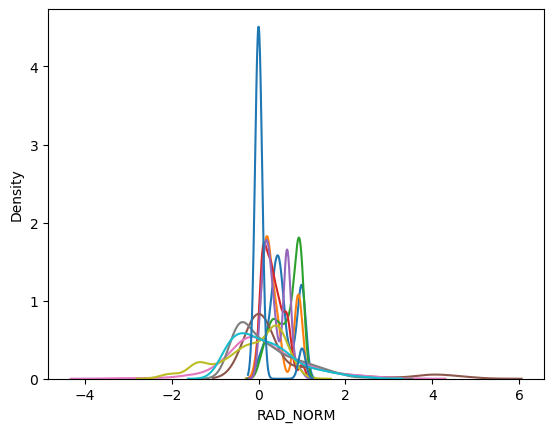

In [34]:
#fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20, 10))
#axes = axes.flat
columnas_numeric = X_train[['RAD_NORM', 'TAX_NORM', 'AGE_NORM', 'NOX_NORM',
       'INDUS_NORM','ZN_R','RM_R','DIS_R','PTRATIO_R','LSTAT_R','CHAS']]

for i, column in enumerate(columnas_numeric):
    sns.kdeplot(
        data    = X_train,
        x       = column)
    
   

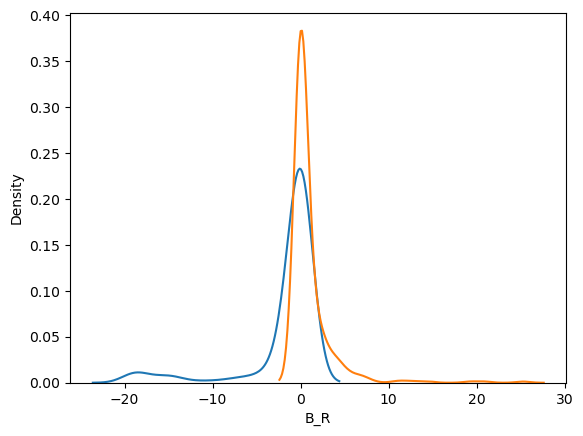

In [35]:
#fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20, 10))
#axes = axes.flat
columnas_numeric = X_train[['B_R', 'CRIM_R']]

for i, column in enumerate(columnas_numeric):
    sns.kdeplot(
        data    = X_train,
        x       = column)

In [36]:
X_train_new=X_train

In [37]:

X_train_new.drop(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],axis=1,inplace=True)

In [39]:
X_train_new.describe().T

,count,mean,std,min,25%,50%,75%,max
CHAS,404.0,0.079208,0.270398,0.000000,0.000000,0.000000,0.000000,1.000000
TAX_NORM,404.0,0.412705,0.322577,0.000000,0.171756,0.270992,0.914122,1.000000
AGE_NORM,404.0,0.669780,0.294163,0.000000,0.415551,0.761071,0.936406,1.000000
NOX_NORM,404.0,0.345733,0.240524,0.000000,0.129630,0.308642,0.491770,1.000000
INDUS_NORM,404.0,0.389205,0.251041,0.000000,0.173387,0.317632,0.646628,1.000000
RAD_NORM,404.0,0.576114,0.305566,0.000000,0.375000,0.500000,1.000000,1.000000
CRIM_R,404.0,0.985969,2.604181,-0.064938,-0.043221,0.000000,0.956779,25.265791
ZN_R,404.0,0.576361,1.164414,0.000000,0.000000,0.000000,1.000000,5.000000
RM_R,404.0,0.119763,0.919278,-3.491831,-0.403134,0.000000,0.596866,3.469156
DIS_R,404.0,0.173745,0.698588,-0.714397,-0.393017,0.000000,0.606983,2.907621


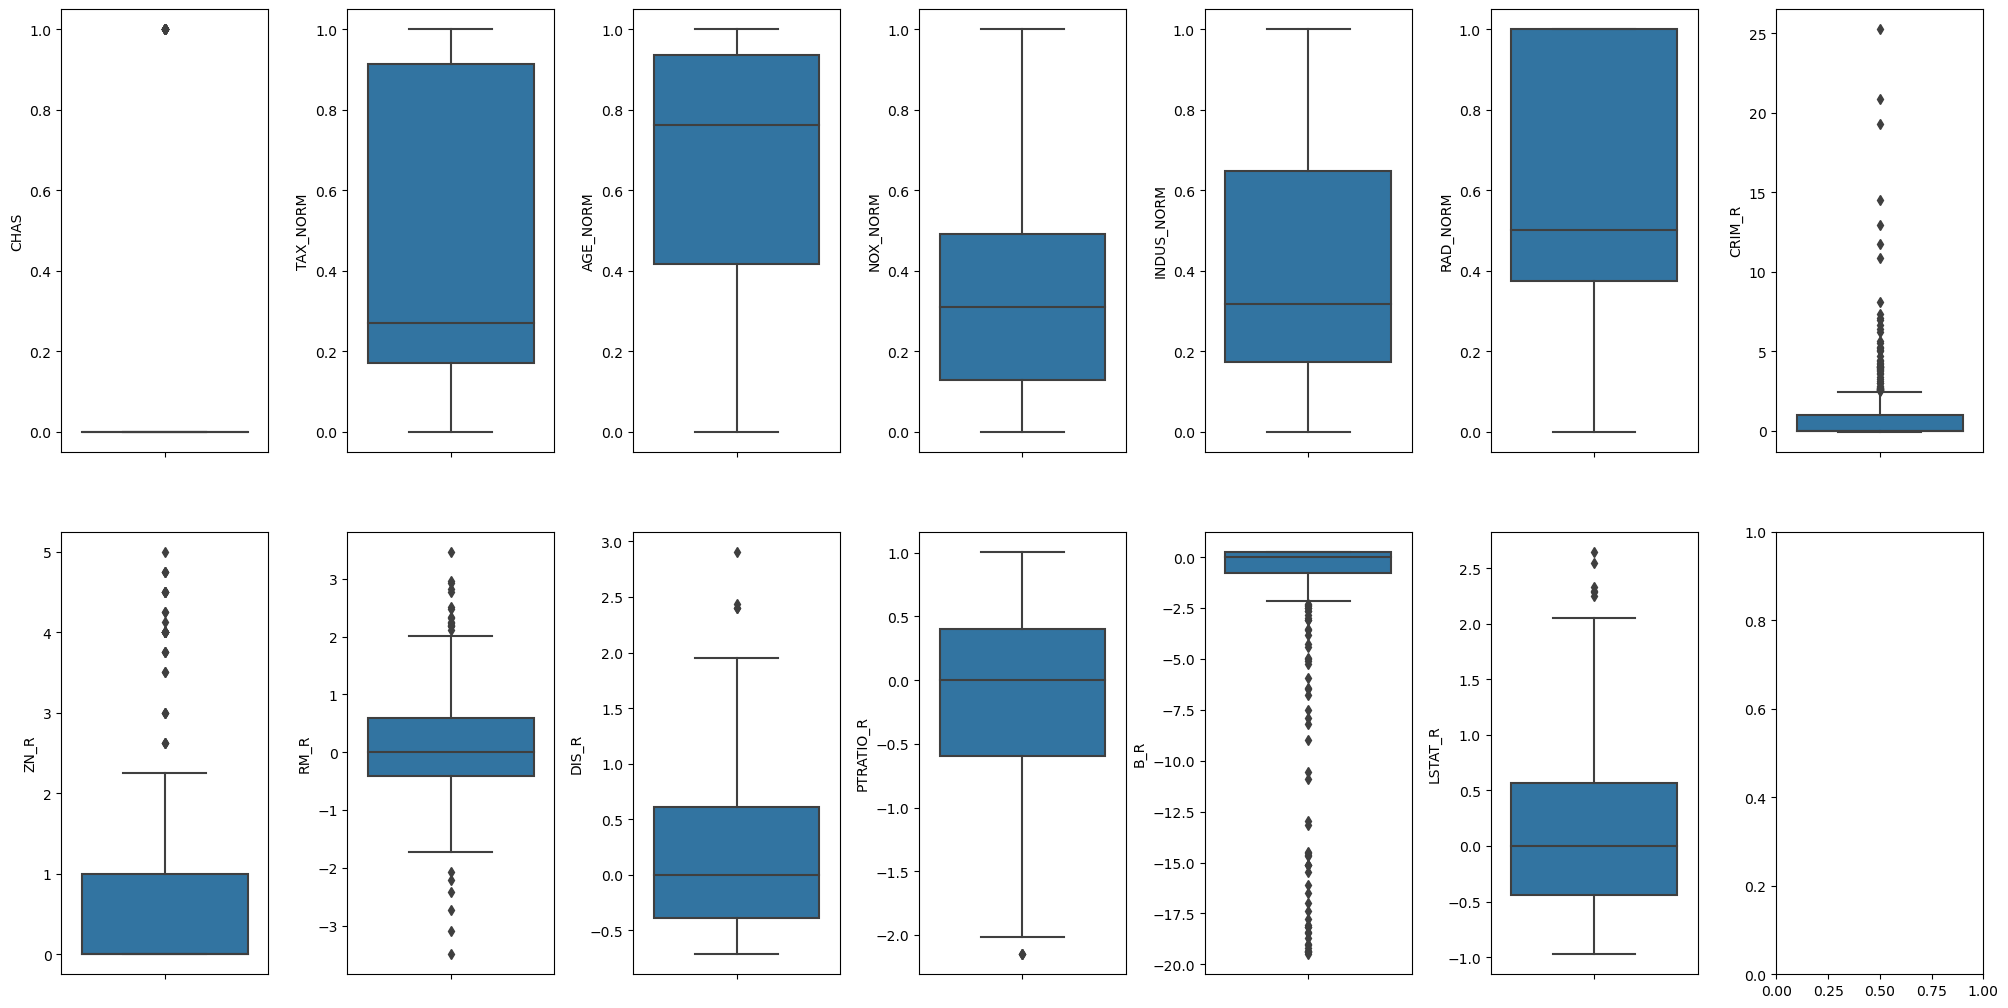

In [40]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in X_train_new.items():
    sns.boxplot(y=k, data=X_train_new, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## EXERCICI 3

Aplicamos el proceso de transformación al conjunto test

In [42]:
X_test.loc[X_test['RAD']==24,'RAD']=9

In [44]:
X_test[['TAX_NORM','AGE_NORM','NOX_NORM','INDUS_NORM','RAD_NORM']]=scaler_minmax.transform(X_test
                                                                                     [['TAX','AGE','NOX','INDUS','RAD']])

In [45]:
X_test[['CRIM_R','ZN_R','RM_R','DIS_R','PTRATIO_R','B_R','LSTAT_R']]=scaler_robust.transform(X_test
                                                                                       [['CRIM','ZN','RM','DIS','PTRATIO','B','LSTAT']])

In [47]:
X_test_new=X_test

In [49]:

X_test_new.drop(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],axis=1,inplace=True)

Como las variables no son gaussianas, vamos a utilizar de nuevo el test de MANN-WHITNEY U TEST


H0: las distribuciones de las 2 muestras son iguales  
H1: las distribuciones de las 2 muestras son diferentes

In [52]:
X_test_new.columns

Index(['CHAS', 'TAX_NORM', 'AGE_NORM', 'NOX_NORM', 'INDUS_NORM', 'RAD_NORM',
       'CRIM_R', 'ZN_R', 'RM_R', 'DIS_R', 'PTRATIO_R', 'B_R', 'LSTAT_R'],
      dtype='object')

In [53]:
from scipy.stats import mannwhitneyu

list_mannwhit_new=['CHAS', 'TAX_NORM', 'AGE_NORM', 'NOX_NORM', 'INDUS_NORM', 'RAD_NORM',
       'CRIM_R', 'ZN_R', 'RM_R', 'DIS_R', 'PTRATIO_R', 'B_R', 'LSTAT_R']
for i in list_mannwhit_new:
    data1 = X_train_new[i]
    data2 = X_test_new[i]
    stat, p = mannwhitneyu(data1, data2)
    print('p_value '+str(i),p)


p_value CHAS 0.07699705035778132
p_value TAX_NORM 0.056989525055398976
p_value AGE_NORM 0.3619664487942228
p_value NOX_NORM 0.3503487972892124
p_value INDUS_NORM 0.7480234446996286
p_value RAD_NORM 0.6292210563090463
p_value CRIM_R 0.6065711446362122
p_value ZN_R 0.3975426677463958
p_value RM_R 0.2811695278063633
p_value DIS_R 0.5082116976132062
p_value PTRATIO_R 0.735673559795932
p_value B_R 0.6344904206551112
p_value LSTAT_R 0.4861249147519706



En todos los casos, el p-value es superior al 5%, tenemos que validar H0, las distribuciones de los conjuntos train y test son iguales.